# Import Library

In [1]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import sklearn.metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus


In [2]:
os.chdir("E:\latihan")      #lokasi folder dimana terdapat file yang akan di load

# Load dataset
data = pd.read_csv("tree_addhealth.csv")  

In [3]:
# Explore data
print(data.shape)
data.head(10)


(6504, 25)


,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,2,...,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0,...,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0,...,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0.0,0,...,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0.0,0,...,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,1.0,0,...,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0
8,1.0,0.0,0.0,1.0,0.0,0.0,14.673973,0.0,1.0,0,...,39.0,0.0,0,5.0,24.0,2.250000,0.0,19.0,8.0,15.0
9,1.0,0.0,1.0,0.0,0.0,0.0,14.926027,0.0,0.0,0,...,37.0,1.0,0,2.0,25.0,2.500000,0.0,24.3,3.0,11.0


In [4]:
data.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,6503.00000,6481.000000,6485.000000,6485.000000,6485.000000,6485.000000,4837.000000,6500.000000,6444.000000,6504.000000,...,6483.000000,6454.000000,6504.000000,6448.000000,6368.000000,6274.000000,6486.000000,6504.000000,6477.000000,6369.000000
mean,1.51607,0.114643,0.662143,0.249653,0.036392,0.041635,16.541548,0.197692,0.552452,0.403598,...,40.822459,1.600248,0.101015,2.744882,28.275597,2.802080,0.046099,22.163069,6.113942,13.356100
std,0.49978,0.318615,0.473016,0.432846,0.187277,0.199768,1.581993,0.398289,0.497280,0.950048,...,5.425218,2.596134,0.301371,3.519701,5.184204,0.767025,0.209716,3.413224,3.368731,2.154971
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15.257534,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.300000,4.000000,12.000000
50%,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,16.512329,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,2.000000,29.000000,2.750000,0.000000,23.300000,6.000000,14.000000
75%,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,17.761644,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,8.000000,15.000000
max,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,21.934247,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [5]:
# Mengecek ada berapa banyak NaN pada setiap coloumn
data.isnull().sum()

BIO_SEX         1
HISPANIC       23
WHITE          19
BLACK          19
NAMERICAN      19
ASIAN          19
age          1667
TREG1           4
ALCEVR1        60
ALCPROBS1       0
marever1        0
cocever1        0
inhever1        0
cigavail       60
DEP1           18
ESTEEM1        21
VIOL1          50
PASSIST         0
DEVIANT1       56
SCHCONN1      136
GPA1          230
EXPEL1         18
FAMCONCT        0
PARACTV        27
PARPRES       135
dtype: int64

In [6]:
# Membuang baris yang di salah satu kolomnya terdapat NaN (null coloumn)
data_clean = data.dropna()
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [7]:
data_clean.isnull().sum()

BIO_SEX      0
HISPANIC     0
WHITE        0
BLACK        0
NAMERICAN    0
ASIAN        0
age          0
TREG1        0
ALCEVR1      0
ALCPROBS1    0
marever1     0
cocever1     0
inhever1     0
cigavail     0
DEP1         0
ESTEEM1      0
VIOL1        0
PASSIST      0
DEVIANT1     0
SCHCONN1     0
GPA1         0
EXPEL1       0
FAMCONCT     0
PARACTV      0
PARPRES      0
dtype: int64

In [8]:
# Decission tree hanya bisa mengolah data numeric
# Chek kolom apa saja yang merupakan data numeric

num_of_numerical_cols = data_clean._get_numeric_data().columns.shape[0]
print(num_of_numerical_cols, 'numerical columns')
name_of_numerical_cols = data_clean._get_numeric_data().columns
print(name_of_numerical_cols)

25 numerical columns
Index(['BIO_SEX', 'HISPANIC', 'WHITE', 'BLACK', 'NAMERICAN', 'ASIAN', 'age',
       'TREG1', 'ALCEVR1', 'ALCPROBS1', 'marever1', 'cocever1', 'inhever1',
       'cigavail', 'DEP1', 'ESTEEM1', 'VIOL1', 'PASSIST', 'DEVIANT1',
       'SCHCONN1', 'GPA1', 'EXPEL1', 'FAMCONCT', 'PARACTV', 'PARPRES'],
      dtype='object')


In [9]:
# explore the data
data_clean[['TREG1', 'marever1', 'ALCEVR1']].sample(10)

,TREG1,marever1,ALCEVR1
4775,0.0,0,1.0
2846,0.0,0,0.0
5103,0.0,1,1.0
1268,0.0,0,1.0
4925,1.0,1,1.0
5961,0.0,0,1.0
1909,0.0,0,0.0
1273,0.0,1,1.0
6457,0.0,0,0.0
3537,0.0,0,0.0


In [10]:
#Split into training and testing sets

predictors = data_clean[['ALCEVR1','marever1']]         # explanatory variable,

targets = data_clean.TREG1                              # respon variable 

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.2, random_state = 0)   # 0.2 = 80% train data; 20% test data


In [11]:
print('X_train = ',X_train.shape  )
print('X_test = ',X_test.shape  )
print('y_train = ',y_train.shape  )
print('y_test = ',y_test.shape  )

X_train =  (3660, 2)
X_test =  (915, 2)
y_train =  (3660,)
y_test =  (915,)


In [12]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
confusion_array = sklearn.metrics.confusion_matrix(y_test,predictions)
print(confusion_array)

[[750   0]
 [165   0]]


In [13]:
print('TN = ', confusion_array[0,0] ) # True Negative
print('FN = ', confusion_array[1,0] ) # False Negative
print('TP = ', confusion_array[1,1] ) # True Positive
print('FP = ', confusion_array[0,1] ) # False Positive

TN =  750
FN =  165
TP =  0
FP =  0


In [14]:
# Accuracy Score
sklearn.metrics.accuracy_score(y_test, predictions) 

0.819672131147541

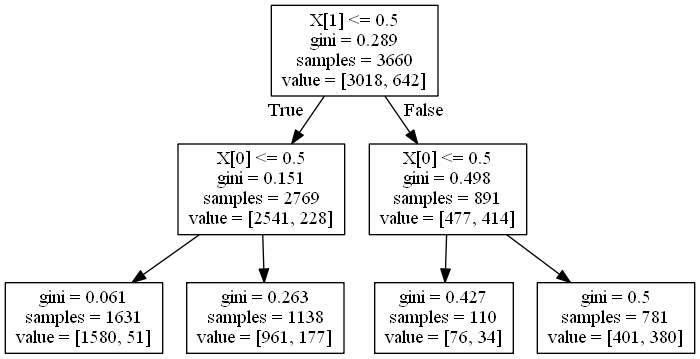

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
